HW3

In [60]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd 
import numpy as np
import csv
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import time
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

In [2]:
with open('/Users/gulsumirembas/Desktop/DataSetA.csv', newline='') as f:
    reader = csv.reader(f)
    List = list(reader)

print(List)

[['Lassi', 'Coffee Powder', 'Butter', 'Yougurt', 'Ghee', 'Cheese', ''], ['Ghee', 'Coffee Powder', ''], ['Lassi', 'Tea Powder', 'Butter', 'Cheese', ''], ['Cheese', 'Tea Powder', 'Panner', 'Coffee Powder', 'Butter', 'Bread', ''], ['Cheese', 'Yougurt', 'Coffee Powder', 'Sugar', 'Butter', 'Sweet', ''], ['Sugar', 'Tea Powder', 'Ghee', 'Sweet', 'Panner', 'Milk', ''], ['Sweet', 'Coffee Powder', ''], ['Butter', 'Ghee', 'Panner', ''], ['Sweet', 'Tea Powder', 'Butter', 'Yougurt', 'Sugar', 'Cheese', ''], ['Panner', 'Ghee', ''], ['Milk', 'Panner', 'Tea Powder', 'Sweet', 'Bread', ''], ['Ghee', 'Coffee Powder', 'Milk', 'Yougurt', 'Lassi', 'Sugar', 'Butter', 'Panner', ''], ['Butter', 'Coffee Powder', 'Panner', 'Sweet', 'Ghee', 'Lassi', ''], ['Bread', 'Lassi', 'Coffee Powder', 'Tea Powder', 'Sweet', 'Ghee', 'Sugar', 'Panner', ''], ['Milk', 'Sweet', 'Butter', 'Sugar', 'Lassi', 'Panner', ''], ['Bread', 'Coffee Powder', 'Tea Powder', ''], ['Butter', 'Ghee', 'Milk', 'Cheese', ''], ['Bread', 'Coffee Powder

In [3]:
te = TransactionEncoder()
te_ary = te.fit(List).transform(List)
te_ary

array([[ True, False,  True, ..., False, False,  True],
       [ True, False, False, ..., False, False, False],
       [ True, False,  True, ..., False,  True, False],
       ...,
       [ True,  True, False, ..., False, False,  True],
       [ True,  True, False, ..., False, False,  True],
       [ True,  True, False, ..., False, False,  True]])

In [4]:
te.columns_

['',
 'Bread',
 'Butter',
 'Cheese',
 'Coffee Powder',
 'Ghee',
 'Lassi',
 'Milk',
 'Panner',
 'Sugar',
 'Sweet',
 'Tea Powder',
 'Yougurt']

In [5]:
Product_df= pd.DataFrame(te_ary, columns=te.columns_)

In [6]:
Product_df.head()

,,Bread,Butter,Cheese,Coffee Powder,Ghee,Lassi,Milk,Panner,Sugar,Sweet,Tea Powder,Yougurt
0,True,False,True,True,True,True,True,False,False,False,False,False,True
1,True,False,False,False,True,True,False,False,False,False,False,False,False
2,True,False,True,True,False,False,True,False,False,False,False,True,False
3,True,True,True,True,True,False,False,False,True,False,False,True,False
4,True,False,True,True,True,False,False,False,False,True,True,False,True


In [7]:
Product_df.drop(Product_df.columns[[0]], axis=1, inplace = True)

In [8]:
Product_df.head()

,Bread,Butter,Cheese,Coffee Powder,Ghee,Lassi,Milk,Panner,Sugar,Sweet,Tea Powder,Yougurt
0,False,True,True,True,True,True,False,False,False,False,False,True
1,False,False,False,True,True,False,False,False,False,False,False,False
2,False,True,True,False,False,True,False,False,False,False,True,False
3,True,True,True,True,False,False,False,True,False,False,True,False
4,False,True,True,True,False,False,False,False,True,True,False,True


In [9]:
apriori(Product_df, min_support=0.001, use_colnames=True)

,support,itemsets
0,0.437809,(Bread)
1,0.437570,(Butter)
2,0.437171,(Cheese)
3,0.439805,(Coffee Powder)
4,0.439885,(Ghee)
...,...,...
3798,0.001038,"(Cheese, Ghee, Lassi, Tea Powder, Butter, Suga..."
3799,0.001118,"(Cheese, Ghee, Lassi, Butter, Yougurt, Sugar, ..."
3800,0.001038,"(Cheese, Ghee, Lassi, Tea Powder, Butter, Youg..."
3801,0.001038,"(Cheese, Ghee, Tea Powder, Butter, Yougurt, Su..."


In [10]:
def apriori_algorithm(transaction_matrix, min_support = 0.001):
     start_time = time.time()
     rule_items = apriori(transaction_matrix, 
                       min_support=min_support, 
                       use_colnames=True)
     total_execution = time.time() - start_time
     print("Computed Apriori!")
     rule_items['number_of_items'] = rule_items['itemsets'].apply(lambda x: len(x))
     return rule_items, total_execution

In [12]:
def FPGrowth_algorithm(transaction_matrix, min_support = 0.001):
    start_time = time.time()
    rule_items = fpgrowth(transaction_matrix, 
                       min_support=min_support, 
                       use_colnames=True)
    total_execution = time.time() - start_time
    print("Computed Fp Growth!")
    rule_items['number_of_items'] = rule_items['itemsets'].apply(lambda x: len(x))
    return rule_items, total_execution

In [14]:
def compute_association_rule(rule_matrix, metric="lift", min_thresh=1):
    rules = association_rules(rule_matrix, 
                              metric=metric, 
                              min_threshold=min_thresh)
    
    return rules

In [15]:
def plot_metrics_relationship(rule_matrix, col1, col2):
    fit = np.polyfit(rule_matrix[col1], rule_matrix[col2], 1)
    fit_funt = np.poly1d(fit)
    plt.plot(rule_matrix[col1], rule_matrix[col2], 'yo', rule_matrix[col1], 
    fit_funt(rule_matrix[col1]))
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('{} vs {}'.format(col1, col2))

In [16]:
def compare_time_exec(algo1=list, alg2=list):
    execution_times = [algo1[1], algo2[1]]
    algo_names = (algo1[0], algo2[0])
    y=np.arange(len(algo_names))
    
    plt.bar(y,execution_times,color=['orange', 'blue'])
    plt.xticks(y,algo_names)
    plt.xlabel('Algorithms')
    plt.ylabel('Time')
    plt.title("Execution Time (seconds) Comparison")
    plt.show()

# Using FPGrowth Algorithm

Lift

In [17]:
fpgrowth_matrix, fpgrowth_total_execution = FPGrowth_algorithm(Product_df, min_support=0.001)

Computed Fp Growth!


In [18]:
print("Fp Growth execution took: {} seconds".format(fpgrowth_total_execution))

Fp Growth execution took: 0.3351600170135498 seconds


In [19]:
fpgrowth_matrix.head()

,support,itemsets,number_of_items
0,0.439885,(Ghee),1
1,0.439805,(Coffee Powder),1
2,0.439326,(Yougurt),1
3,0.437570,(Butter),1
4,0.437171,(Cheese),1


In [20]:
fpgrowth_matrix.tail()

,support,itemsets,number_of_items
3798,0.044947,"(Milk, Sugar, Yougurt, Bread)",4
3799,0.021954,"(Yougurt, Sugar, Bread, Milk, Coffee Powder)",5
3800,0.021475,"(Ghee, Yougurt, Sugar, Bread, Coffee Powder)",5
3801,0.021076,"(Ghee, Yougurt, Sugar, Bread, Milk)",5
3802,0.009979,"(Ghee, Yougurt, Sugar, Bread, Milk, Coffee Pow...",6


In [21]:
fp_growth_rule_lift = compute_association_rule(fpgrowth_matrix)

In [22]:
fp_growth_rule_lift.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Milk),(Ghee),0.441162,0.439885,0.200463,0.454397,1.032991,0.006402,1.026599
1,(Ghee),(Milk),0.439885,0.441162,0.200463,0.455717,1.032991,0.006402,1.026741
2,(Ghee),(Coffee Powder),0.439885,0.439805,0.205812,0.467877,1.063827,0.012348,1.052754
3,(Coffee Powder),(Ghee),0.439805,0.439885,0.205812,0.467962,1.063827,0.012348,1.052772
4,(Milk),(Coffee Powder),0.441162,0.439805,0.201022,0.455664,1.036059,0.006996,1.029134


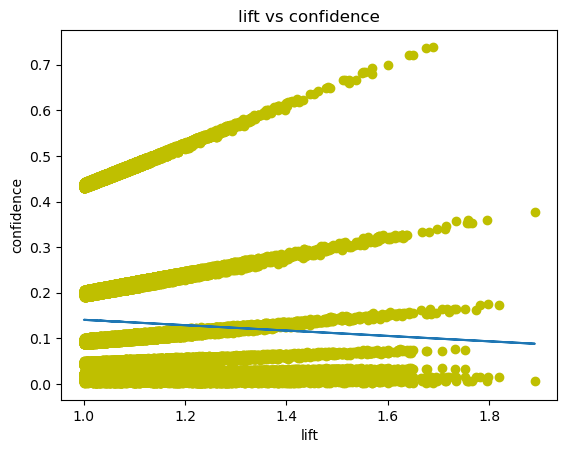

In [23]:
plot_metrics_relationship(fp_growth_rule_lift, col1='lift', col2='confidence')

Confidence

In [24]:
fp_growth_rule = compute_association_rule(fpgrowth_matrix, metric="confidence", min_thresh=0.2)
fp_growth_rule.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Milk),(Ghee),0.441162,0.439885,0.200463,0.454397,1.032991,0.006402,1.026599
1,(Ghee),(Milk),0.439885,0.441162,0.200463,0.455717,1.032991,0.006402,1.026741
2,(Ghee),(Coffee Powder),0.439885,0.439805,0.205812,0.467877,1.063827,0.012348,1.052754
3,(Coffee Powder),(Ghee),0.439805,0.439885,0.205812,0.467962,1.063827,0.012348,1.052772
4,(Milk),(Coffee Powder),0.441162,0.439805,0.201022,0.455664,1.036059,0.006996,1.029134


In [28]:
fp_growth_rule = compute_association_rule(fpgrowth_matrix, metric="lift")
fp_growth_rule.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Milk),(Ghee),0.441162,0.439885,0.200463,0.454397,1.032991,0.006402,1.026599
1,(Ghee),(Milk),0.439885,0.441162,0.200463,0.455717,1.032991,0.006402,1.026741
2,(Ghee),(Coffee Powder),0.439885,0.439805,0.205812,0.467877,1.063827,0.012348,1.052754
3,(Coffee Powder),(Ghee),0.439805,0.439885,0.205812,0.467962,1.063827,0.012348,1.052772
4,(Milk),(Coffee Powder),0.441162,0.439805,0.201022,0.455664,1.036059,0.006996,1.029134


# Using Apriori Algorithm

In [33]:
apriori_matrix, apriori_exec_time = apriori_algorithm(Product_df, min_support=0.001)
print("Apriori Execution took: {} seconds".format(apriori_exec_time))

Computed Apriori!
Apriori Execution took: 0.37482595443725586 seconds


In [34]:
apriori_matrix.head()

,support,itemsets,number_of_items
0,0.437809,(Bread),1
1,0.437570,(Butter),1
2,0.437171,(Cheese),1
3,0.439805,(Coffee Powder),1
4,0.439885,(Ghee),1


In [35]:
apriori_matrix.tail()

,support,itemsets,number_of_items
3798,0.001038,"(Cheese, Ghee, Lassi, Tea Powder, Butter, Suga...",9
3799,0.001118,"(Cheese, Ghee, Lassi, Butter, Yougurt, Sugar, ...",9
3800,0.001038,"(Cheese, Ghee, Lassi, Tea Powder, Butter, Youg...",9
3801,0.001038,"(Cheese, Ghee, Tea Powder, Butter, Yougurt, Su...",9
3802,0.001118,"(Ghee, Lassi, Tea Powder, Butter, Yougurt, Sug...",9


Lift

In [36]:
apriori_rule_lift = compute_association_rule(apriori_matrix)

In [37]:
apriori_rule_lift.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Butter),(Bread),0.437570,0.437809,0.19695,0.450100,1.028074,0.005378,1.022351
1,(Bread),(Butter),0.437809,0.437570,0.19695,0.449854,1.028074,0.005378,1.022329
2,(Cheese),(Bread),0.437171,0.437809,0.20198,0.462016,1.055291,0.010582,1.044995
3,(Bread),(Cheese),0.437809,0.437171,0.20198,0.461342,1.055291,0.010582,1.044873
4,(Coffee Powder),(Bread),0.439805,0.437809,0.20182,0.458885,1.048140,0.009269,1.038949


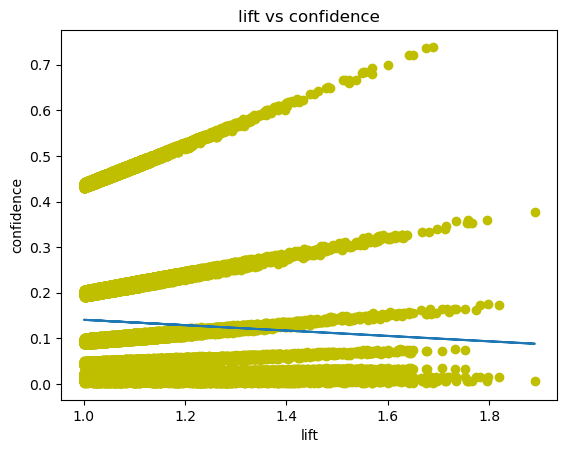

In [38]:
plot_metrics_relationship(apriori_rule_lift, col1='lift', col2='confidence')

Confidence

In [41]:
apriori_rule = compute_association_rule(apriori_matrix, metric="confidence", min_thresh=0.2)
apriori_rule.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Butter),(Bread),0.437570,0.437809,0.19695,0.450100,1.028074,0.005378,1.022351
1,(Bread),(Butter),0.437809,0.437570,0.19695,0.449854,1.028074,0.005378,1.022329
2,(Cheese),(Bread),0.437171,0.437809,0.20198,0.462016,1.055291,0.010582,1.044995
3,(Bread),(Cheese),0.437809,0.437171,0.20198,0.461342,1.055291,0.010582,1.044873
4,(Coffee Powder),(Bread),0.439805,0.437809,0.20182,0.458885,1.048140,0.009269,1.038949


# Compartive Analyzis

Time Execution

In [52]:
FPG = ['Fp Growth', fpgrowth_total_execution]
APR = ['Apriori', apriori_exec_time]

compare_time_exec(FPG , APR)


NameError: name 'algo2' is not defined

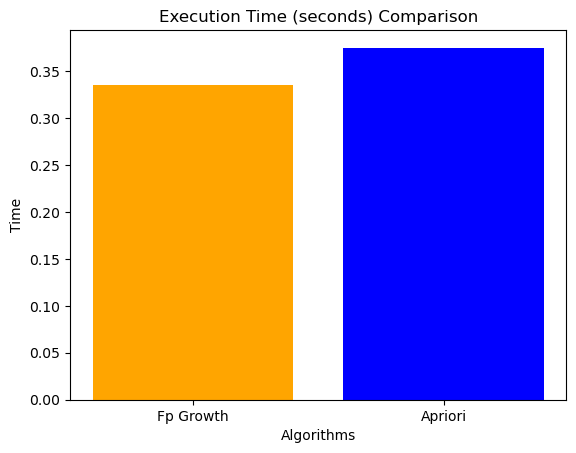

In [59]:
algo1 = ['Fp Growth', fpgrowth_total_execution]
algo2 = ['Apriori', apriori_exec_time]
compare_time_exec(algo1, algo2)

# Conclusion